In [1]:
import os, sys
current_dir = os.path.dirname(os.path.abspath("../module.py"))
sys.path.append(current_dir)
from module import *

In [2]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

In [3]:
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

In [4]:
model = Sequential()
model.add(Embedding(5000, 100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [5]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

In [7]:
history = model.fit(X_train, y_train, batch_size=40, epochs=100,
                    validation_split=0.25, callbacks=[early_stopping_callback])

Epoch 1/100
469/469 [==============================] - 69s 141ms/step - loss: 0.4008 - accuracy: 0.8013 - val_loss: 0.3065 - val_accuracy: 0.8749
Epoch 2/100
469/469 [==============================] - 70s 148ms/step - loss: 0.2365 - accuracy: 0.9067 - val_loss: 0.2538 - val_accuracy: 0.8922
Epoch 3/100
469/469 [==============================] - 68s 146ms/step - loss: 0.1859 - accuracy: 0.9301 - val_loss: 0.2638 - val_accuracy: 0.8947
Epoch 4/100
469/469 [==============================] - 68s 146ms/step - loss: 0.1445 - accuracy: 0.9478 - val_loss: 0.2863 - val_accuracy: 0.8893
Epoch 5/100
469/469 [==============================] - 65s 139ms/step - loss: 0.1165 - accuracy: 0.9582 - val_loss: 0.3032 - val_accuracy: 0.8872


In [8]:
print('Test Accuracy: %.4f'%(model.evaluate(X_test, y_test)[1]))

782/782 [==============================] - 19s 24ms/step - loss: 0.3284 - accuracy: 0.8774
Test Accuracy: 0.8774


In [9]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

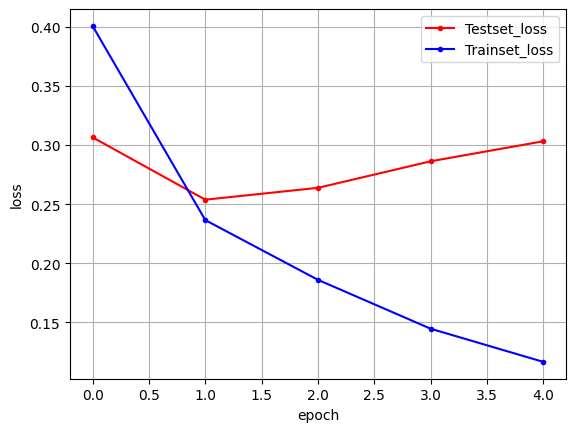

In [10]:
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()